In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

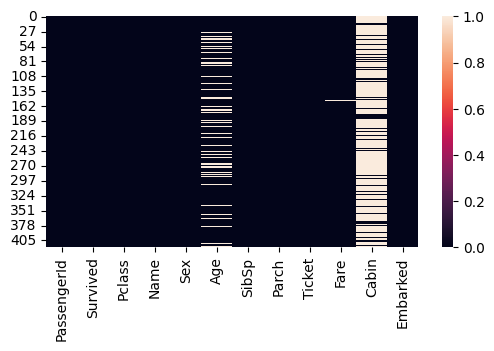

In [6]:
plt.figure(figsize=(6,3))
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [9]:
cols = data.columns
print(cols)
data["Cabin"] = data["Cabin"].apply(lambda x: "X" if pd.isnull(x) else x[0])
data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,X,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,X,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,X,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,X,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,X,S


[0.9791514  0.08159595 0.03626487 0.02719865 0.17225812 0.04533108
 0.02719865 0.00906622]


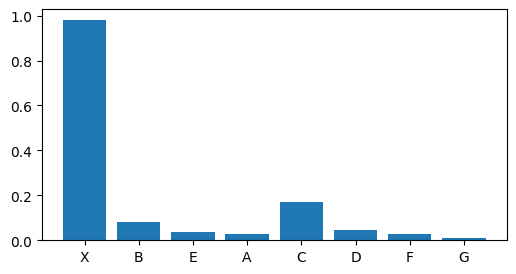

In [10]:
x_labels = data["Cabin"].unique()
height_labels = []
for i in x_labels:
    height_labels.append(data["Cabin"][(data["Survived"] == 1)&(data["Cabin"] == i)].count())
height_labels = np.array(height_labels)
norm_val = np.linalg.norm(height_labels)
height_labels = height_labels/norm_val
print(height_labels)

plt.figure(figsize=(6,3))
plt.bar(x_labels,height_labels)
plt.show()

In [11]:
data["Cabin_marked"] = data["Cabin"].apply(lambda x: 0 if x == "X" else 1)
data.drop(["Cabin","PassengerId","Name","Ticket"],axis=1,inplace=True)

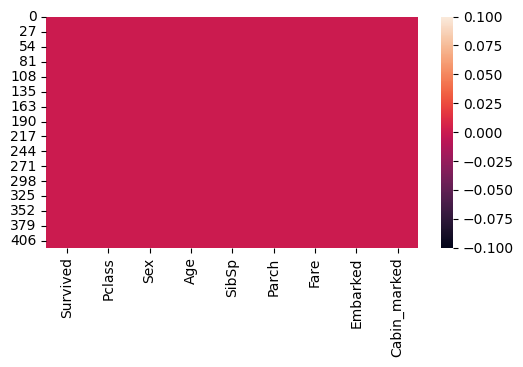

In [12]:

mean_age = data["Age"].mean()
data["Age"].fillna(mean_age,inplace=True)
data.dropna(inplace=True)

plt.figure(figsize=(6,3))
sns.heatmap(data.isnull())
plt.show()

In [13]:
data = pd.get_dummies(data)
data.head()
data.drop(["Sex_female","Embarked_S"],axis=1,inplace=True)

In [14]:
cols = data.columns
features,output = list(cols[1:]),[cols[0]]
print(features,output)
data.head()

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_marked', 'Sex_male', 'Embarked_C', 'Embarked_Q'] ['Survived']


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_marked,Sex_male,Embarked_C,Embarked_Q
0,0,3,34.5,0,0,7.8292,0,1,0,1
1,1,3,47.0,1,0,7.0000,0,0,0,0
2,0,2,62.0,0,0,9.6875,0,1,0,1
3,0,3,27.0,0,0,8.6625,0,1,0,0
4,1,3,22.0,1,1,12.2875,0,0,0,0


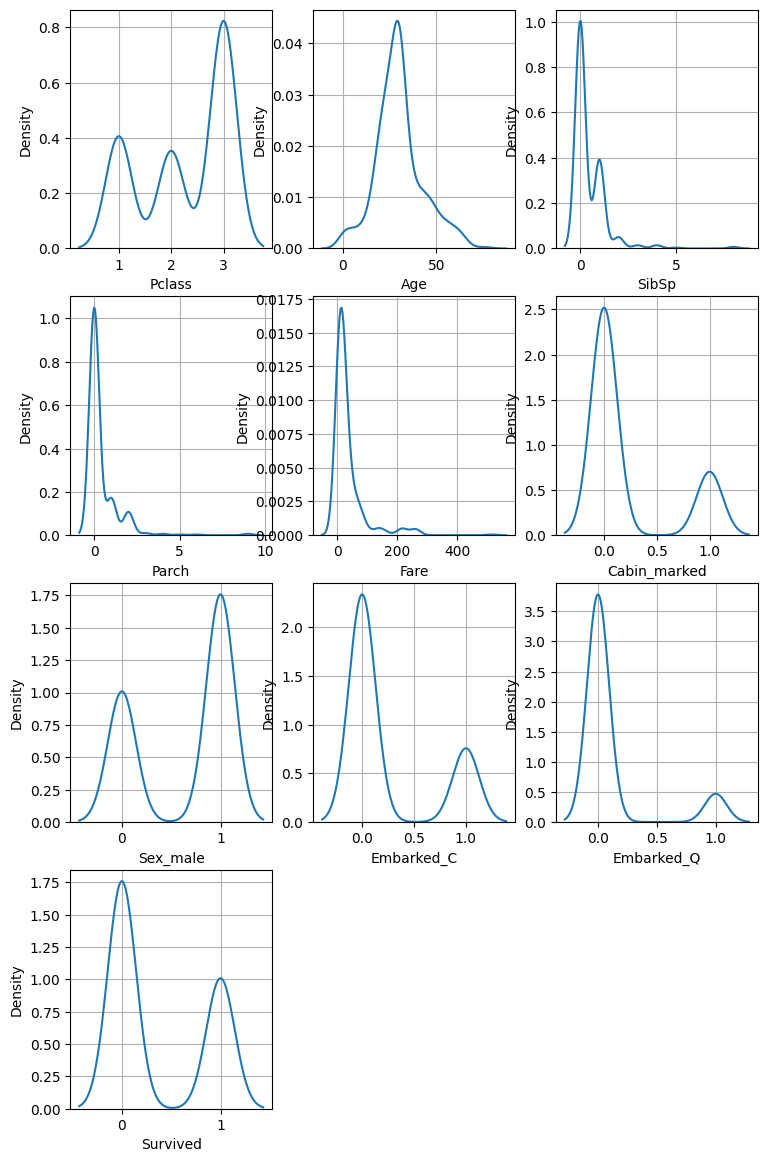

In [15]:
it = 1

for i in features+output:
    plt.subplot(4,3,it)
    plt.xlabel(i)
    plt.subplots_adjust(right=1.2,top=2.4)
    sns.kdeplot(data[i])
    plt.grid()
    it+=1

plt.show()
    

<Axes: >

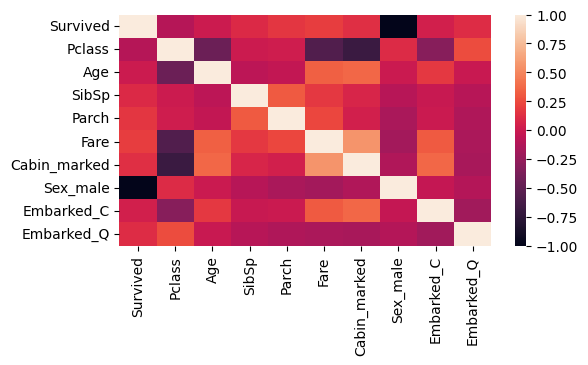

In [16]:
plt.figure(figsize=(6,3))
sns.heatmap(data.corr())

In [17]:
X,y = data.drop(["Survived"],axis = 1),data["Survived"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
model = LogisticRegression(max_iter = 500)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [19]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[79,  0],
       [ 0, 47]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

